In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras import regularizers
import PIL.Image

Using TensorFlow backend.


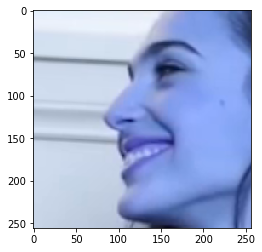

In [2]:
DATADIR = "C:/Users/limju/detection_train"
CATEGORIES = ["real", "fake"]


for category in CATEGORIES:
    path = os.path.join(DATADIR, category) #path to real and fake images
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break
    
    #shown in blue due to cv2 reading rgb in bgr opposite

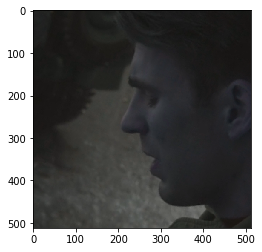

In [3]:
TESTDIR = "C:/Users/limju/detection_test"
CATEGORIES = ["real", "fake"]


for category in CATEGORIES:
    path = os.path.join(TESTDIR, category) #path to real and fake images
    for img in os.listdir(path):
        img_array2 = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array2)
        plt.show()
        break
    break
    
    #shown in blue due to cv2 reading rgb in bgr opposite

In [4]:
print(img_array.shape)

(256, 256, 3)


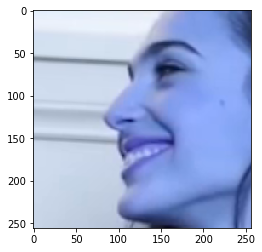

In [5]:
#As we said we would take in 256x256 images for detection this part is to resize any images that are not of the same size to
#a standardize sizing
IMG_SIZE = 256

new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [6]:
training_data = []

#data augmentation to reduce the amount of overfitting by flipping horizontally, not able to conduct saturation etc due to it being one of the
#features that nn is looking for
# we are going to change map real and fake to 0 and 1
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) #path to real and fake images
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                training_data.append([new_array, class_num])

                #flipped = cv2.flip(img_array, 1)
                #new_array = cv2.resize(flipped, (IMG_SIZE,IMG_SIZE))
                #training_data.append([new_array, class_num])
            except Exception as e:
                print(e)
                pass

create_training_data()

In [7]:
print(training_data[1])

[array([[[245, 255, 255],
        [245, 255, 255],
        [245, 255, 255],
        ...,
        [ 47,  48,  71],
        [ 47,  48,  71],
        [ 47,  48,  71]],

       [[245, 255, 255],
        [245, 255, 255],
        [245, 255, 255],
        ...,
        [ 46,  49,  71],
        [ 46,  49,  71],
        [ 46,  49,  71]],

       [[245, 255, 255],
        [245, 255, 255],
        [245, 255, 255],
        ...,
        [ 45,  50,  71],
        [ 45,  50,  71],
        [ 45,  50,  71]],

       ...,

       [[231, 247, 255],
        [230, 246, 255],
        [230, 246, 255],
        ...,
        [ 90, 107, 154],
        [ 89, 107, 154],
        [ 87, 105, 152]],

       [[231, 247, 255],
        [230, 246, 255],
        [230, 246, 255],
        ...,
        [ 86, 104, 149],
        [ 85, 104, 149],
        [ 84, 103, 148]],

       [[230, 246, 255],
        [230, 246, 255],
        [230, 246, 255],
        ...,
        [ 83, 100, 144],
        [ 81, 100, 144],
        [ 81, 100, 143]

In [8]:
print(len(training_data))

40598


In [9]:
#shuffle the training data, so it is more random for the neural network
#prevents more single type of images from going through the neural network thus
#biased against maybe real or fake
import random

random.shuffle(training_data)


In [10]:
for sample in training_data[:10]:
    print(sample[1])

0
1
1
0
1
1
1
1
0
0


In [11]:
training_data = training_data[:10000]


In [12]:
fake = 0
real = 0

for sample in training_data[:10000]:
    if sample[1] == 0:
        real += 1
    else:
        fake += 1

print("fake val: ", fake)
print("real val: " , real)

fake val:  5125
real val:  4875


In [13]:
X = []
y = []

In [14]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    


In [15]:
#convert X to a numpy array due to keros
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)



In [16]:
X[1]

array([[[ 51,  79, 118],
        [ 51,  79, 119],
        [ 52,  79, 120],
        ...,
        [ 47,  26,  90],
        [ 47,  27,  91],
        [ 48,  28,  92]],

       [[ 52,  80, 120],
        [ 52,  80, 121],
        [ 52,  80, 122],
        ...,
        [ 47,  26,  90],
        [ 48,  28,  92],
        [ 49,  29,  93]],

       [[ 52,  81, 121],
        [ 52,  81, 121],
        [ 52,  80, 122],
        ...,
        [ 47,  27,  91],
        [ 48,  28,  92],
        [ 49,  29,  93]],

       ...,

       [[131, 158, 220],
        [131, 158, 220],
        [131, 158, 220],
        ...,
        [ 65,  66,  65],
        [ 52,  52,  52],
        [ 43,  43,  43]],

       [[131, 158, 220],
        [131, 158, 220],
        [131, 158, 220],
        ...,
        [ 60,  60,  60],
        [ 50,  50,  50],
        [ 42,  42,  42]],

       [[131, 158, 220],
        [131, 158, 220],
        [131, 158, 220],
        ...,
        [ 56,  57,  56],
        [ 48,  48,  48],
        [ 41,  41,  41]]

In [17]:
#using Convolutional Neural Network



In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state=42)



In [19]:
print(X_train[1])
print(y_train[1])

[[[ 55  88 126]
  [ 56  88 125]
  [ 57  89 127]
  ...
  [ 31  37  52]
  [  0   0   0]
  [  0   0   0]]

 [[ 55  88 126]
  [ 57  88 127]
  [ 59  91 130]
  ...
  [ 32  38  54]
  [  0   0   0]
  [  0   0   0]]

 [[ 54  87 126]
  [ 58  90 129]
  [ 62  94 133]
  ...
  [ 30  37  53]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[132 156 209]
  [132 158 211]
  [132 157 212]
  ...
  [ 18  20  22]
  [ 11  14  13]
  [  0   0   0]]

 [[131 155 208]
  [131 157 210]
  [132 158 212]
  ...
  [ 20  23  24]
  [ 13  15  15]
  [  0   0   0]]

 [[146 172 231]
  [145 173 232]
  [147 174 235]
  ...
  [  7   8   9]
  [  5   5   5]
  [  0   0   0]]]
1


In [20]:
#scale the img data (Normalization) Since is image, min value 0 , max value 255
#https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/

X_train = X_train/255.0
X_test = X_test/255.0


#nhwc = number of images in batch, height of images, width of images, number of channels of the image (3 for rgb)
#VGG model of conv-conv - pool - conv-conv- pool > added 2 more conv layers
model = Sequential()
model.add(Conv2D(32, (7,7), activation="relu",input_shape = (256,256,3)))
model.add(Conv2D(32, (7,7), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Conv2D(64, (7,7), activation="relu"))

model.add(Conv2D(64, (7,7), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.20))

model.add(Conv2D(128, (5,5), activation="relu"))
model.add(Dropout(0.20))
model.add(Conv2D(128, (5,5), activation="relu"))
model.add(Dropout(0.20))
#flatten the layer conv 2d dense is 1d data set
model.add(Flatten()) #convets 3d feature maps to 1D feature Vectors


model.add(Dense(64, activation="relu",kernel_regularizer=regularizers.l2(0.001)))

model.add(Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.001)))

model.add(Dense(1, kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('sigmoid'))

sgd = tf.keras.optimizers.SGD(learning_rate=0.01,decay=1e-4 ,nesterov=True)
model.compile(loss="binary_crossentropy", optimizer=sgd, metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=4, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
2000/2000 [==============================] - 3647s 2s/step - loss: 0.7826 - accuracy: 0.6129 - val_loss: 0.6796 - val_accuracy: 0.7330
Epoch 2/20
2000/2000 [==============================] - 3820s 2s/step - loss: 0.5533 - accuracy: 0.7856 - val_loss: 0.4560 - val_accuracy: 0.8280
Epoch 3/20
2000/2000 [==============================] - 3677s 2s/step - loss: 0.4654 - accuracy: 0.8226 - val_loss: 0.5403 - val_accuracy: 0.7830
Epoch 4/20
2000/2000 [==============================] - 3622s 2s/step - loss: 0.4294 - accuracy: 0.8381 - val_loss: 0.3979 - val_accuracy: 0.8485
Epoch 5/20
2000/2000 [==============================] - 3089s 2s/step - loss: 0.3916 - accuracy: 0.8600 - val_loss: 0.3870 - val_accuracy: 0.8535
Epoch 6/20
2000/2000 [==============================] - 3047s 2s/step - loss: 0.3718 - accuracy: 0.8769 - val_loss: 0.3742 - val_accuracy: 0.8680
Epoch 7/20
2000/2000 [==============================] - 3047s 2s/step - loss: 0.3455 - accuracy: 0.8976 - val_loss: 0.3614 -

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 250, 250, 32)      4736      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 244, 244, 32)      50208     
_________________________________________________________________
batch_normalization (BatchNo (None, 244, 244, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 122, 122, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 116, 116, 64)      100416    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 110, 110, 64)      200768    
_________________________________________________________________
batch_normalization_1 (Batch (None, 110, 110, 64)      2

In [22]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy: ', test_acc)

63/63 [==============================] - 99s 2s/step - loss: 0.2792 - accuracy: 0.9545
Test accuracy:  0.9545000195503235


In [23]:
print('Test Loss: ', test_loss)

Test Loss:  0.27922314405441284


In [24]:
#saving the trained model
model.save('C:/Users/limju/detection_model/vgg_20model.h5') 

#loading the model
loaded_model = tf.keras.models.load_model('C:/Users/limju/detection_model/model.h5')

loaded_model.summary()

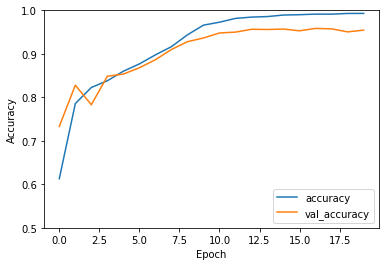

In [25]:
#chart to show the training curve
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()
#test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [26]:

from sklearn.metrics import roc_auc_score, classification_report
prediction = model.predict(X_test)

prediction = prediction.astype(np.int)
test_y = y_test.astype(np.int)

print(roc_auc_score(test_y, prediction))
print(classification_report(test_y, prediction))


0.7779369627507163
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       953
           1       1.00      0.56      0.71      1047

    accuracy                           0.77      2000
   macro avg       0.84      0.78      0.76      2000
weighted avg       0.84      0.77      0.76      2000

